In [24]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 23.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 8.2 MB/s eta 0:00:0000:01
You should consider upgrading via the '/sw/pkgs/arc/python/3.10.4/bin/python3.10 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_context("notebook")  # make figures fit
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import sklearn.preprocessing as skp
import sklearn.decomposition as skd

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
vehicle = pd.read_csv("vehicles.csv")

In [8]:
list(vehicle.groupby(["model"]).count().\
                  sort_values(by="id",ascending=False).iloc[:10,].index)

['f-150',
 'silverado 1500',
 '1500',
 'camry',
 'silverado',
 'accord',
 'wrangler',
 'civic',
 'altima',
 'escape']

In [46]:
import numpy as np
model_list = list(vehicle.groupby(["model"]).count().\
                  sort_values(by="id",ascending=False).iloc[:1,].index)
vehicle_1 = vehicle[(vehicle["model"].notna()) & (vehicle["year"].notna())\
                    & (vehicle["price"].notna())\
                    & (vehicle["odometer"].notna()) & (vehicle["price"]!=0) \
                    & (vehicle["model"].isin(model_list))]
vehicle_1["age"] = 2021-vehicle_1["year"].astype(float)
vehicle_1["price"] = vehicle_1["price"].astype(float)
vehicle_1["logged age"] = np.log(vehicle_1["age"])
vehicle_1.rename(columns={"odometer":"mileage"},inplace=True)
vehicle_1["logged mileage"] = np.log(vehicle_1["mileage"])
vehicle_1["logged price"] = np.log(vehicle_1["price"])
vehicle_1["model"] = pd.Categorical(vehicle_1["model"])
vehicle_1 = vehicle_1[(vehicle_1["age"]>=1) & (vehicle_1["price"]>1) & (vehicle_1["mileage"]>1)]
vehicle_1 = vehicle_1[["model","price","age","mileage","logged price"\
                       ,"logged age","logged mileage"]]
vehicle_1.shape

(6920, 7)

In [13]:
vehicle_1.describe()

,price,age,mileage,logged price,logged age,logged mileage
count,3.319200e+04,33192.000000,3.319200e+04,33192.000000,33192.000000,33192.000000
mean,6.001560e+04,9.621144,1.187071e+05,9.366689,2.030215,11.380929
std,7.739590e+06,6.408260,2.579937e+05,1.109371,0.731406,0.915057
min,3.000000e+00,1.000000,2.000000e+00,1.098612,0.000000,0.693147
25%,6.900000e+03,5.000000,6.563200e+04,8.839277,1.609438,11.091819
50%,1.477700e+04,8.000000,1.080000e+05,9.600827,2.079442,11.589887
75%,2.596425e+04,13.000000,1.500000e+05,10.164476,2.564949,11.918391
max,1.410065e+09,75.000000,1.000000e+07,21.066902,4.317488,16.118096


Text(0, 0.5, 'Logged Mileage')

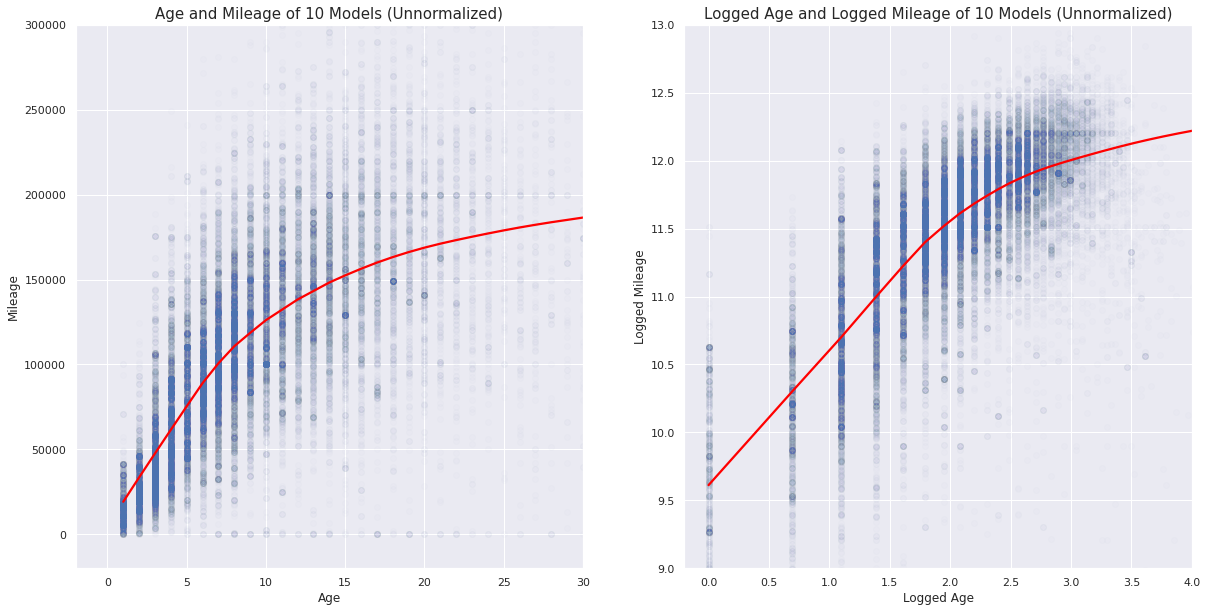

In [18]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
g1 = sns.regplot(x="age",y="mileage",data=vehicle_1,scatter_kws={'alpha':0.01}\
                 ,lowess=True, \
                 line_kws={"color": "red"},ax=axs[0])
g1.set_title("Age and Mileage of 10 Models (Unnormalized)", fontsize=15)
g1.set_xlim([-2,30])
g1.set_ylim([-20000,300000])
g1.set_xlabel("Age")
g1.set_ylabel("Mileage")

sns.set(rc={'figure.figsize':(10,10)})
g2 = sns.regplot(x="logged age",y="logged mileage",data=vehicle_1,scatter_kws={'alpha':0.01}\
                 ,lowess=True, \
                 line_kws={"color": "red"},ax=axs[1])
g2.set_title("Logged Age and Logged Mileage of 10 Models (Unnormalized)", fontsize=15)
g2.set_xlim([-0.2,4])
g2.set_ylim([9,13])
g2.set_xlabel("Logged Age")
g2.set_ylabel("Logged Mileage")

In [56]:
vehicle_norm = vehicle_1.copy()
vehicle_norm.iloc[:,1:7] = skp.scale(vehicle_norm.iloc[:,1:7])
vehicle_norm.describe()

,price,age,mileage,logged price,logged age,logged mileage
count,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03
mean,-9.035804e-17,-4.928620e-17,1.437514e-17,-1.774303e-15,1.807161e-16,1.125368e-15
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.649102e+00,-1.194513e+00,-3.261824e-01,-8.207432e+00,-2.643671e+00,-9.688745e+00
25%,-8.075006e-01,-7.400189e-01,-1.638558e-01,-3.837176e-01,-7.504221e-01,-3.496148e-01
50%,-2.478715e-02,-2.855253e-01,-4.818799e-02,2.938277e-01,1.383982e-02,2.253991e-01
75%,7.091841e-01,3.204662e-01,6.448116e-02,6.780816e-01,6.311116e-01,5.890755e-01
max,5.445338e+00,1.001633e+01,2.574375e+01,1.813271e+00,3.252681e+00,5.079329e+00


In [57]:
pca_model_1 = skd.PCA().fit(vehicle_norm[["age","mileage"]])
vehicle_norm[["PC2","PC1"]] = pca_model_1.transform(vehicle_norm[["age","mileage"]])
pca_model_2 = skd.PCA().fit(vehicle_norm[["logged age","logged mileage"]])
vehicle_norm[["log_PC2","log_PC1"]] = pca_model_2.\
transform(vehicle_norm[["logged age","logged mileage"]])

(-3.0, 4.0)

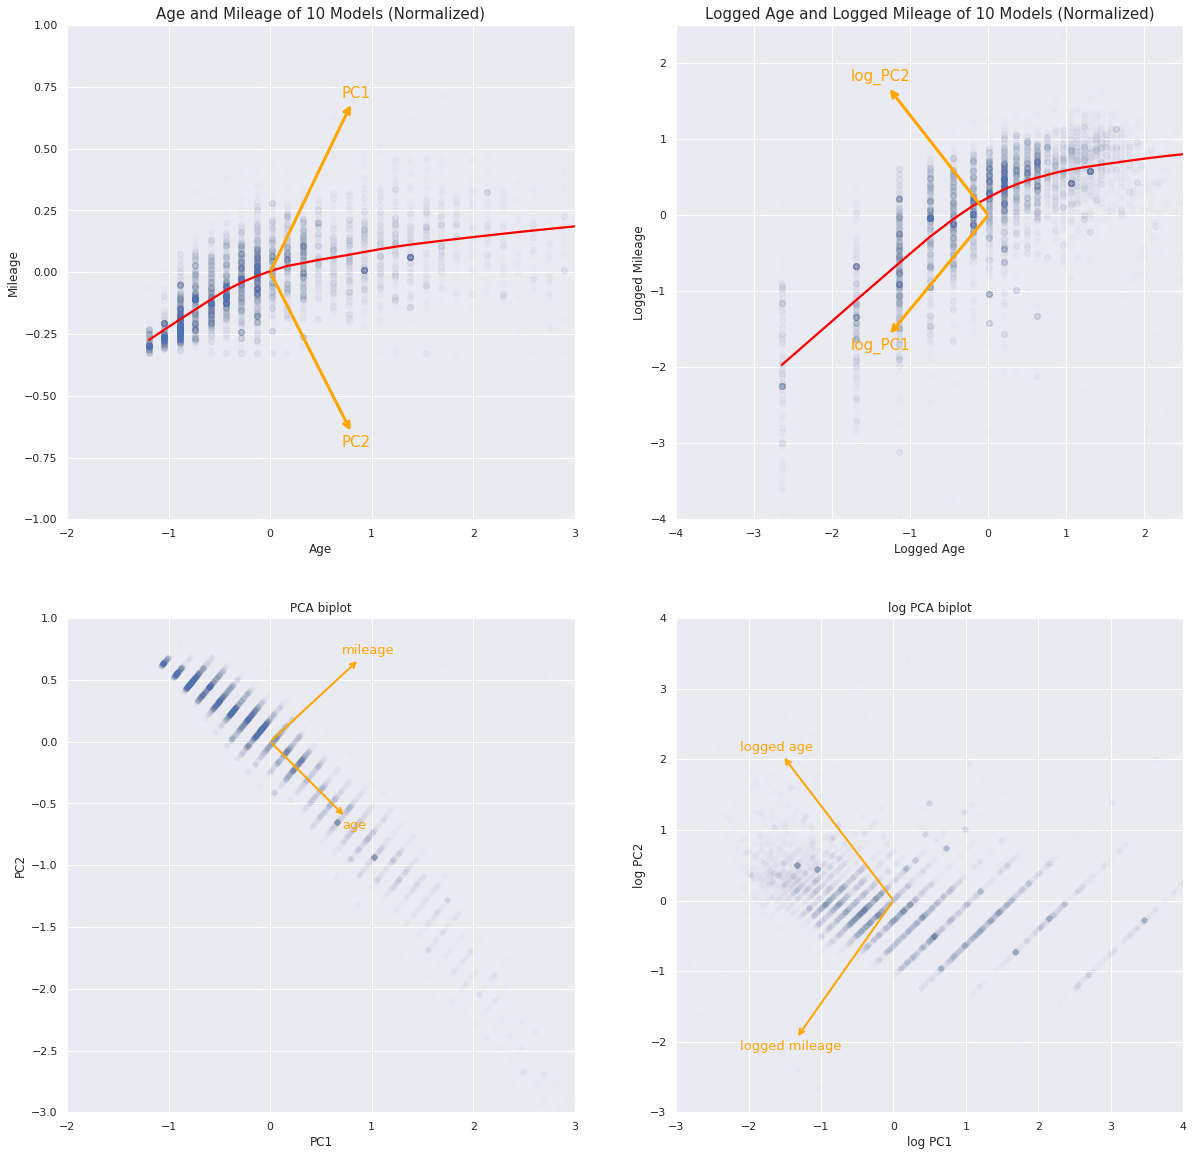

In [61]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
g1 = sns.regplot(x="age",y="mileage",data=vehicle_norm,scatter_kws={'alpha':0.01}\
                 ,lowess=True, \
                 line_kws={"color": "red"},ax=axs[0,0])
X = pca_model_1.transform(vehicle_norm[["age","mileage"]])
V = pca_model_1.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    g1.annotate(vehicle_norm[["PC2","PC1"]].columns[i], 
                 xy=(0,0), xytext=v[:2]*1, 
                 fontsize=15, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=3, color='orange'))
g1.set_title("Age and Mileage of 10 Models (Normalized)", fontsize=15)
g1.set_xlim([-2,3])
g1.set_ylim([-1,1])
g1.set_xlabel("Age")
g1.set_ylabel("Mileage")

g2 = sns.regplot(x="logged age",y="logged mileage",data=vehicle_norm,scatter_kws={'alpha':0.01}\
                 ,lowess=True, \
                 line_kws={"color": "red"},ax=axs[0,1])
X = pca_model_2.transform(vehicle_norm[["logged age","logged mileage"]])
V = pca_model_2.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    g2.annotate(vehicle_norm[["log_PC2","log_PC1"]].columns[i], 
                 xy=(0,0), xytext=v[:2]*2.5, 
                 fontsize=15, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=3, color='orange'))
g2.set_title("Logged Age and Logged Mileage of 10 Models (Normalized)", fontsize=15)
g2.set_xlim([-4,2.5])
g2.set_ylim([-4,2.5])
g2.set_xlabel("Logged Age")
g2.set_ylabel("Logged Mileage")

pca_model = skd.PCA().fit(vehicle_norm[["age","mileage"]])
X = pca_model_1.transform(vehicle_norm[["age","mileage"]])
g3 = sns.scatterplot(x=X[:,0], y=X[:,1],alpha=0.01,ax=axs[1,0])
V = pca_model_1.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    g3.annotate(vehicle_norm[["age","mileage"]].columns[i], 
                 xy=(0,0), xytext=v[:2]*1, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))
g3.set_xlabel('PC1')
g3.set_ylabel('PC2')
g3.set_title('PCA biplot')
g3.set_ylim(-3, 1)
g3.set_xlim(-2, 3)    
    
pca_model = skd.PCA().fit(vehicle_norm[["logged age","logged mileage"]])
X = pca_model_2.transform(vehicle_norm[["logged age","logged mileage"]])
g4 = sns.scatterplot(x=X[:,0], y=X[:,1],alpha=0.01,ax=axs[1,1])
V = pca_model_2.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    g4.annotate(vehicle_norm[["logged age","logged mileage"]].columns[i], 
                 xy=(0,0), xytext=v[:2]*3, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))
g4.set_xlabel('log PC1')
g4.set_ylabel('log PC2')
g4.set_title('log PCA biplot')
g4.set_ylim(-3, 4)
g4.set_xlim(-3, 4)     

In [62]:
vehicle_norm.rename(columns={"logged price":"logged_price","logged age":"logged_age","logged mileage":"logged_mileage",\
                            "log PC2":"log_PC2","log PC1":"log_PC1"},inplace=True)

In [63]:
vehicle_norm

,model,price,age,mileage,logged_price,logged_age,logged_mileage,PC2,PC1,log_PC2,log_PC1
228,f-150,-1.259306,5.168398,0.296864,-1.176514,2.492964,1.088006,3.864524,-3.444695,-2.532128,0.993455
235,f-150,0.336700,-0.740019,-0.062902,0.500907,-0.750422,0.167274,-0.567751,0.478794,0.412348,-0.648909
249,f-150,1.011074,-0.891517,-0.247931,0.802229,-1.143307,-1.129421,-0.805711,0.455084,1.607061,-0.009818
337,f-150,-1.014531,0.168968,0.101339,-0.674605,0.500947,0.685443,0.191136,-0.047821,-0.838905,-0.130458
537,f-150,-1.401205,0.926458,0.315113,-1.642426,1.054687,1.118864,0.877923,-0.432286,-1.536933,-0.045380
...,...,...,...,...,...,...,...,...,...,...,...
426444,f-150,-1.010983,0.168968,0.103946,-0.668862,0.500947,0.691941,0.192979,-0.045978,-0.843500,-0.135053
426456,f-150,-0.975509,5.016900,-0.148933,-0.613129,2.460829,-0.255616,3.442173,-3.652795,-1.559321,1.920816
426613,f-150,0.230631,-0.437023,-0.166225,0.444335,-0.196682,-0.365328,-0.426561,0.191483,0.397401,0.119250
426664,f-150,-1.582126,2.592934,0.219832,-2.986666,1.805880,0.946938,1.988926,-1.678037,-1.946536,0.607364


In [66]:
import numpy as np
model_list = list(vehicle.groupby(["model"]).count().\
                  sort_values(by="id",ascending=False).iloc[:1,].index)
vehicle_1 = vehicle[(vehicle["model"].notna()) & (vehicle["year"].notna())\
                    & (vehicle["price"].notna())\
                    & (vehicle["odometer"].notna()) & (vehicle["price"]!=0) \
                    & (vehicle["model"].isin(model_list))]
vehicle_1["age"] = 2021-vehicle_1["year"].astype(float)
vehicle_1["price"] = vehicle_1["price"].astype(float)
vehicle_1["logged age"] = np.log(vehicle_1["age"])
vehicle_1.rename(columns={"odometer":"mileage"},inplace=True)
vehicle_1["logged mileage"] = np.log(vehicle_1["mileage"])
vehicle_1["logged price"] = np.log(vehicle_1["price"])
vehicle_1["model"] = pd.Categorical(vehicle_1["model"])
vehicle_1 = vehicle_1[(vehicle_1["age"]>=1) & (vehicle_1["price"]>1) & (vehicle_1["mileage"]>1)]
vehicle_1 = vehicle_1[["model","price","age","mileage","logged price"\
                       ,"logged age","logged mileage"]]
vehicle_1.shape

(6920, 7)

In [67]:
vehicle_norm = vehicle_1.copy()
vehicle_norm.iloc[:,1:7] = skp.scale(vehicle_norm.iloc[:,1:7])
vehicle_norm.describe()

,price,age,mileage,logged price,logged age,logged mileage
count,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03,6.920000e+03
mean,-9.035804e-17,-4.928620e-17,1.437514e-17,-1.774303e-15,1.807161e-16,1.125368e-15
std,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00,1.000072e+00
min,-1.649102e+00,-1.194513e+00,-3.261824e-01,-8.207432e+00,-2.643671e+00,-9.688745e+00
25%,-8.075006e-01,-7.400189e-01,-1.638558e-01,-3.837176e-01,-7.504221e-01,-3.496148e-01
50%,-2.478715e-02,-2.855253e-01,-4.818799e-02,2.938277e-01,1.383982e-02,2.253991e-01
75%,7.091841e-01,3.204662e-01,6.448116e-02,6.780816e-01,6.311116e-01,5.890755e-01
max,5.445338e+00,1.001633e+01,2.574375e+01,1.813271e+00,3.252681e+00,5.079329e+00


In [72]:
pca_model_1 = skd.PCA().fit(vehicle_norm[["age","mileage"]])
vehicle_norm[["PC2","PC1"]] = pca_model_1.transform(vehicle_norm[["age","mileage"]])
pca_model_2 = skd.PCA().fit(vehicle_norm[["logged age","logged mileage"]])
vehicle_norm[["log_PC2","log_PC1"]] = pca_model_2.\
transform(vehicle_norm[["logged age","logged mileage"]])
vehicle_norm.rename(columns={"logged price":"logged_price","logged age":"logged_age","logged mileage":"logged_mileage",\
                            "log PC2":"log_PC2","log PC1":"log_PC1"},inplace=True)

In [73]:
vehicle_norm

,model,price,age,mileage,logged_price,logged_age,logged_mileage,PC2,PC1,log_PC2,log_PC1
228,f-150,-1.259306,5.168398,0.296864,-1.176514,2.492964,1.088006,3.864524,-3.444695,-2.532128,0.993455
235,f-150,0.336700,-0.740019,-0.062902,0.500907,-0.750422,0.167274,-0.567751,0.478794,0.412348,-0.648909
249,f-150,1.011074,-0.891517,-0.247931,0.802229,-1.143307,-1.129421,-0.805711,0.455084,1.607061,-0.009818
337,f-150,-1.014531,0.168968,0.101339,-0.674605,0.500947,0.685443,0.191136,-0.047821,-0.838905,-0.130458
537,f-150,-1.401205,0.926458,0.315113,-1.642426,1.054687,1.118864,0.877923,-0.432286,-1.536933,-0.045380
...,...,...,...,...,...,...,...,...,...,...,...
426444,f-150,-1.010983,0.168968,0.103946,-0.668862,0.500947,0.691941,0.192979,-0.045978,-0.843500,-0.135053
426456,f-150,-0.975509,5.016900,-0.148933,-0.613129,2.460829,-0.255616,3.442173,-3.652795,-1.559321,1.920816
426613,f-150,0.230631,-0.437023,-0.166225,0.444335,-0.196682,-0.365328,-0.426561,0.191483,0.397401,0.119250
426664,f-150,-1.582126,2.592934,0.219832,-2.986666,1.805880,0.946938,1.988926,-1.678037,-1.946536,0.607364


In [74]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('logged_price ~ PC1', data=vehicle_norm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     832.4
Date:                Sun, 04 Dec 2022   Prob (F-statistic):          6.24e-173
Time:                        15:12:24   Log-Likelihood:                -9426.0
No. Observations:                6920   AIC:                         1.886e+04
Df Residuals:                    6918   BIC:                         1.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.813e-15      0.011   -1.6e-13      1.000      -0.022       0.022
PC1            0.3620      0.013     28.851      0.000       0.337       0.387
==============================================================================
Omnibus:                     5222.418   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139199.170
Skew:                          -3.379   Prob(JB):                         0.00
Kurtosis:                      23.907   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('logged_price ~ age+mileage', data=vehicle_norm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2373.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:13:23   Log-Likelihood:                -8011.1
No. Observations:                6920   AIC:                         1.603e+04
Df Residuals:                    6917   BIC:                         1.605e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.813e-15      0.009  -1.96e-13      1.000      -0.018       0.018
age           -0.6122      0.009    -65.033      0.000      -0.631      -0.594
mileage       -0.1003      0.009    -10.655      0.000      -0.119      -0.082
==============================================================================
Omnibus:                     4932.623   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           125101.763
Skew:                          -3.115   Prob(JB):                         0.00
Kurtosis:                      22.876   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('price ~ logged_age+logged_mileage', data=vehicle_norm).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     6362.
Date:                Sun, 04 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:14:02   Log-Likelihood:                -6207.9
No. Observations:                6920   AIC:                         1.242e+04
Df Residuals:                    6917   BIC:                         1.244e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.551e-17      0.007  -7.78e-15      1.000      -0.014       0.014
logged_age        -0.7412      0.009    -85.340      0.000      -0.758      -0.724
logged_mileage    -0.1037      0.009    -11.938      0.000      -0.121      -0.087
==============================================================================
Omnibus:                      830.401   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7128.005
Skew:                          -0.253   Prob(JB):                         0.00
Kurtosis:                       7.946   Cond. No.                         1.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""